In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N_SAMPLES = 100
lambda_ = np.linspace(-5,5,num=N_SAMPLES)

def gaussian(mu,sig):
    scale = 1/(np.sqrt(2*np.pi)*sig)
    return scale*np.exp(-np.power(lambda_ - mu, 2.) / (2 * np.power(sig, 2.)))

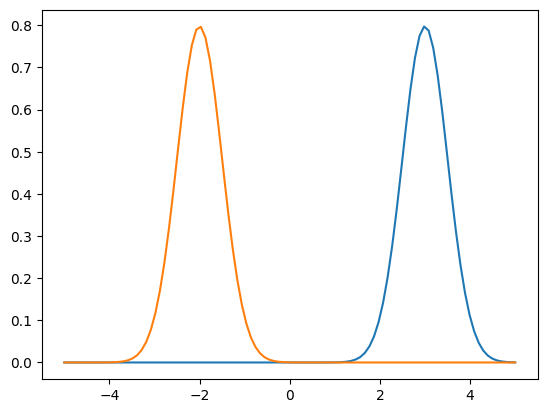

In [4]:
fig, ax = plt.subplots()
f_ref = gaussian(3,0.5)
f_query = gaussian(-2,0.5)
ax.plot(lambda_, f_ref)
ax.plot(lambda_, f_query)
plt.show()

In [5]:
from apdist import AmplitudePhaseDistance as dist

optim_kwargs = {"optim":"DP", "grid_dim":60}
dist(lambda_, f_ref, f_query, **optim_kwargs)

(0.09617343538221734, 0.8728256546550692)

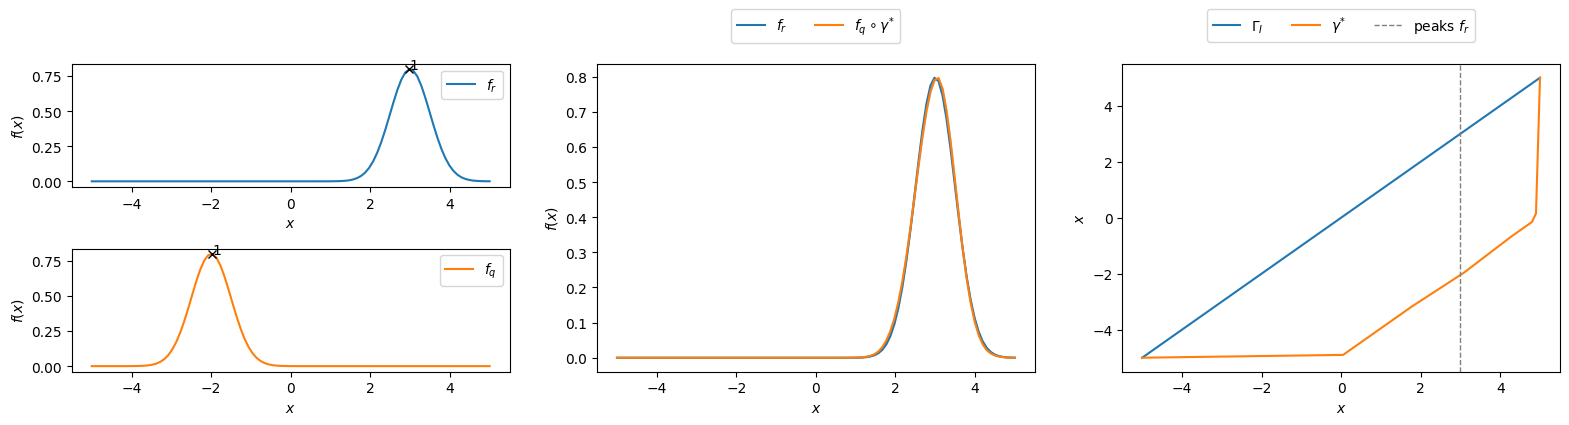

In [6]:
# Plot warped functions and gamma 
from apdist import plot_warping 
from apdist import SquareRootSlopeFramework as SRSF

# for SRSF representation, we map the domain into [0,1]
t = (lambda_-max(lambda_))/(max(lambda_)-min(lambda_))
srsf = SRSF(t)
q_ref = srsf.to_srsf(f_ref)
q_query = srsf.to_srsf(f_query)
gamma = srsf.get_gamma(q_ref, q_query, **optim_kwargs)
f_query_gamma = srsf.warp_f_gamma(f_query, gamma)
plot_warping(lambda_, f_ref, f_query, f_query_gamma, gamma)
plt.show()